# Gender Classification Model Summary
## Overview:
The gender classification model is built using the Logistic Regression algorithm to predict the gender of individuals based on various features. The model is trained on the "gender_classification_v7.csv" dataset, which contains information such as age, height, weight, and shoe size, along with corresponding gender labels.

## Model Performance:
The trained logistic regression model achieved an overall accuracy of 97% on the testing data. This indicates that the model is capable of accurately predicting gender based on the provided features.

## Confusion Matrix:
The confusion matrix provides a detailed summary of the model's predictions. It is visualized as a heatmap to easily identify true positives, true negatives, false positives, and false negatives:

- True Positives (TP): 727
- True Negatives (TN): 729
- False Positives (FP): 24
- False Negatives (FN): 21

## Classification Report:
The classification report presents precision, recall, F1-score, and support for each class (male and female). It provides a more comprehensive view of the model's performance for both classes.

Classification Report:
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.96    |  0.98  |   0.97   |   751   |
|   1   |   0.98    |  0.96  |   0.97   |   750   |
|-------|-----------|--------|----------|---------|
|  avg/total  |   0.97    |  0.97  |   0.97   |  1501   |



Import Requried Packages

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Load the dataset from the CSV file using pandas

In [29]:
data=pd.read_csv("gender_classification_v7.csv")

Display the first few rows of the dataset to get an overview

In [30]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Check the shape of the dataset (number of rows and columns)

In [31]:
data.shape

(5001, 8)

Obtain summary statistics of the dataset (mean, min, max, etc.)

In [32]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Check for any missing values in the dataset

In [33]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Create a copy of the original data to avoid modifying the original dataset

In [34]:
data_copy=data.copy()

Convert the 'gender' column from categorical (text) to numeric using category codes

In [35]:
data_copy['gender']=data_copy['gender'].astype('category')
data_copy['gender']=data_copy['gender'].cat.codes

Separate the features (x) and the target variable (y) for the model

In [36]:
x=data_copy.drop(['gender'],axis=1)
y=data_copy['gender']

Split the dataset into training and testing sets using 70% for training and 30% for testing

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

Import the LogisticRegression model from scikit-learn

In [38]:
from sklearn.linear_model import LogisticRegression

Create an instance of the LogisticRegression model

In [39]:
logistic=LogisticRegression()

Train the logistic regression model on the training data

In [40]:
logistic.fit(x_train,y_train)

LogisticRegression()

Calculate the training accuracy and testing accuracy

In [41]:
print("Training Accuracy: {:.2f}%".format(logistic.score(x_train, y_train) * 100))
print("Testing Accuracy: {:.2f}%".format(logistic.score(x_test, y_test) * 100))

Training Accuracy: 96.57%
Testing Accuracy: 97.00%


Make predictions on the testing data using the trained model

In [42]:
predictions = logistic.predict(x_test)

Create the confusion matrix to evaluate the model's performance

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
matrix=confusion_matrix(y_test,predictions)
print(matrix)

[[727  24]
 [ 21 729]]


Visualize the confusion matrix as a heatmap using seaborn

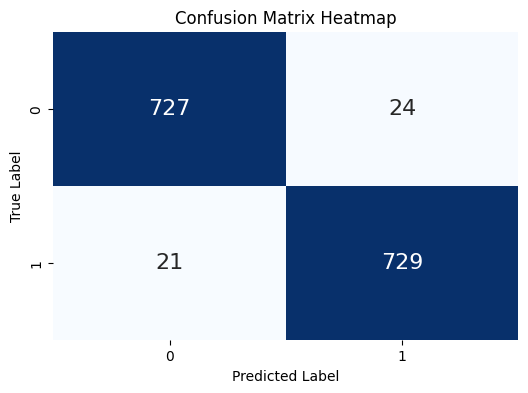

In [44]:
plt.figure(figsize=(6, 4))
sn.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

Calculate and print the classification report, which includes precision, recall, F1-score, and support for each class

In [45]:
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       751
           1       0.97      0.97      0.97       750

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

